In [696]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.segmentation import slic, quickshift, find_boundaries, felzenszwalb
from skimage import feature
from scipy import ndimage
from skimage import exposure
from skimage.filters import rank, sobel_h, sobel_v, sobel, roberts, threshold_otsu
from skimage.filters.rank import enhance_contrast, median, mean, mean_bilateral, otsu
from skimage import color
from skimage.morphology import disk
from scipy.ndimage import morphology
from scipy.ndimage import measurements
from skimage.exposure import equalize_hist
from skimage import feature
from skimage.measure import regionprops
import matplotlib.patches as mpatches

%matplotlib inline

In [757]:
# The input image
solar = r"./train_images/image17.tif"

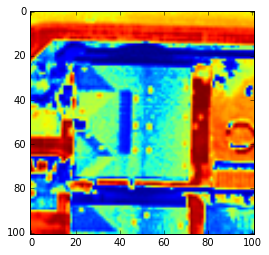

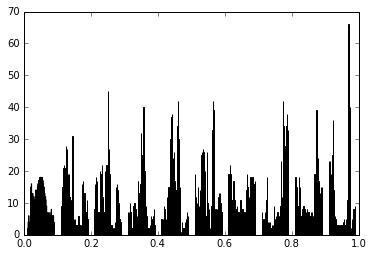

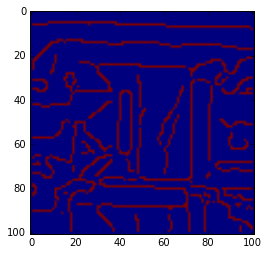

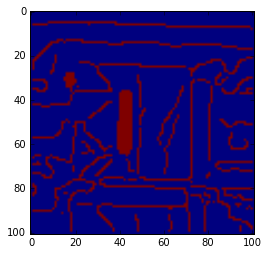

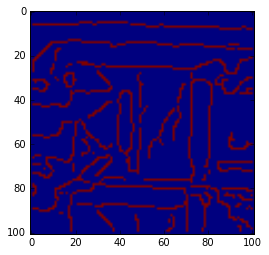

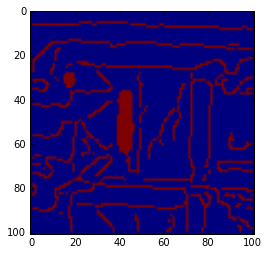

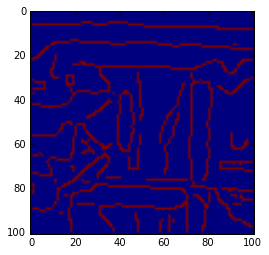

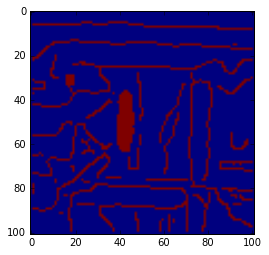

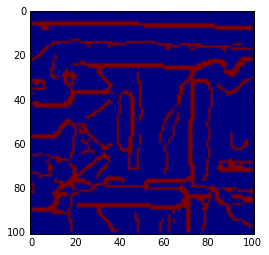

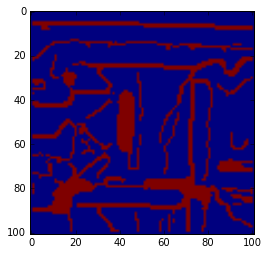

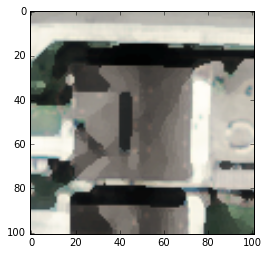

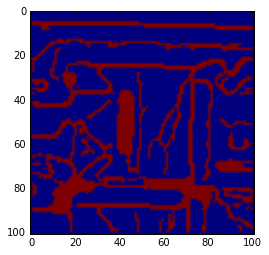

In [760]:
# Convert image to numpy array
img = io.imread(solar)

imgGray = color.rgb2gray(img)
equalized_image = equalize_hist(imgGray)
plt.imshow(equalized_image)
plt.show()
plt.hist(equalized_image)
plt.show() 

equalized_image = median(equalized_image, disk(3))
equalized_image = equalize_hist(equalized_image)
edges1 = feature.canny(equalized_image)
plt.imshow(edges1)
plt.show()
fillHoles1 = morphology.binary_fill_holes(edges1)
plt.imshow(fillHoles1)
plt.show()

equalized_image = enhance_contrast(equalized_image, disk(1))
equalized_image = equalize_hist(equalized_image)
edges1 = feature.canny(equalized_image)
plt.imshow(edges1)
plt.show()
fillHoles2 = morphology.binary_fill_holes(edges1)
plt.imshow(fillHoles2)
plt.show()

equalized_image = median(equalized_image, disk(3))
equalized_image = equalize_hist(equalized_image)
edges1 = feature.canny(equalized_image)
plt.imshow(edges1)
plt.show()
fillHoles3 = morphology.binary_fill_holes(edges1)
plt.imshow(fillHoles3)
plt.show()

equalized_image = enhance_contrast(equalized_image, disk(1))
equalized_image = equalize_hist(equalized_image)
edgesh = sobel_h(equalized_image) > 0.1
edgesv = sobel_v(equalized_image) > 0.1
edges1 = (edges1 + edgesh + edgesv) > 0
plt.imshow(edges1)
plt.show()
fillHoles4 = morphology.binary_fill_holes(edges1)
plt.imshow(fillHoles4)
plt.show()

img[:, :, 0] = img[:,:,0]*equalized_image
img[:, :, 1] = img[:,:,1]*equalized_image
img[:, :, 2] = img[:,:,2]*equalized_image
img = equalize_hist(img)
plt.imshow(img)
plt.show()


fillHoles5 = fillHoles1 + fillHoles2 + fillHoles3 + fillHoles4
plt.imshow(fillHoles5)
plt.show()

(101L, 101L)


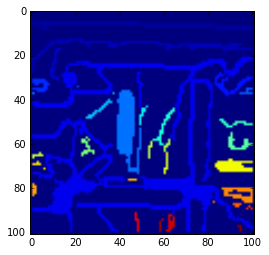

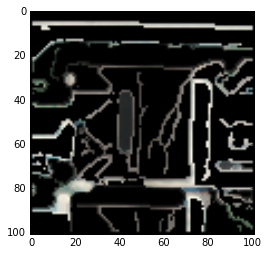

In [761]:
maskedFillHoles = fillHoles5#*(edges1 == 0)

plt.imshow(maskedFillHoles)
#plt.savefig('./train_images/intermediate preprocess/' + 'output' + fn)

labeledRegions, _ = measurements.label(maskedFillHoles)
print(labeledRegions.shape)
plt.imshow(labeledRegions)
plt.show()

img[:, :, 0] = img[:,:,0]*maskedFillHoles
img[:, :, 1] = img[:,:,1]*maskedFillHoles
img[:, :, 2] = img[:,:,2]*maskedFillHoles

plt.imshow(img)

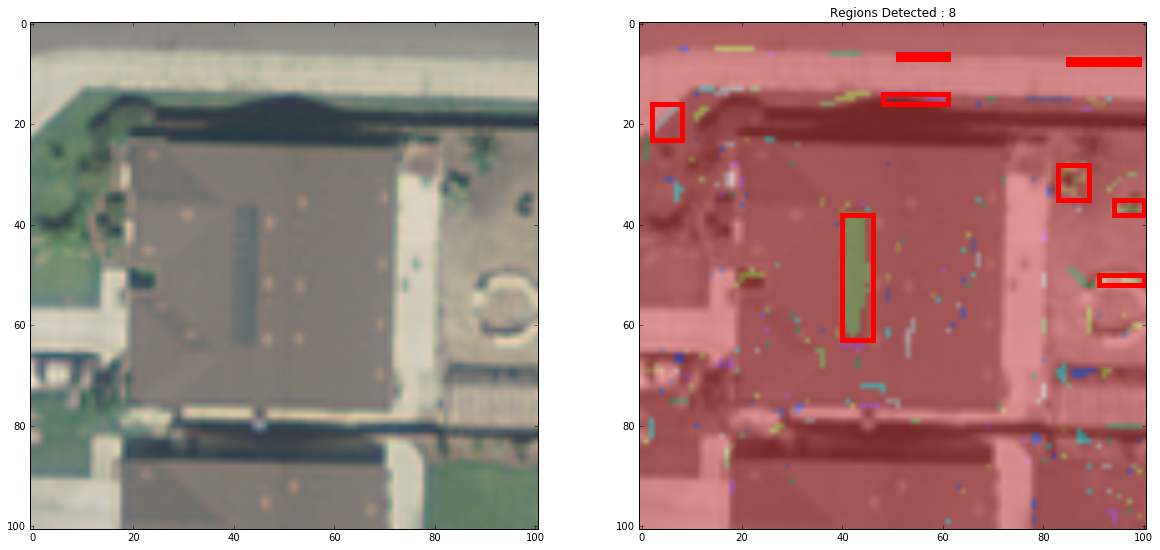

In [734]:
img = io.imread(solar)

image_label_overlay = color.label2rgb(labeledRegions, image=img, image_alpha=1)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize = (20,20))
ax2.imshow(image_label_overlay)

ax1.imshow(img)
n = 0
for region in regionprops(labeledRegions):

    # skip small images
    if region.area < 10:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=5)
    ax2.add_patch(rect)
    n += 1

ax2.set_title("Regions Detected : " + str(n))

0.0976628467039
[1 1 1 ..., 3 3 3]
[0 1 2 3 4 5 6]


(-0.5, 100.5, 100.5, -0.5)

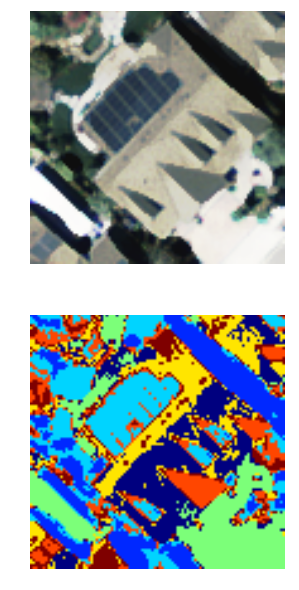

In [694]:
from sklearn.cluster import mean_shift
img = io.imread(solar)
img = equalize_hist(img)

img[:, :, 0] = img[:,:,0]*equalized_image
img[:, :, 1] = img[:,:,1]*equalized_image
img[:, :, 2] = img[:,:,2]*equalized_image
img = equalize_hist(img)

flat_image=np.reshape(img, [-1, 3])
 
#Estimate bandwidth
bandwidth2 = estimate_bandwidth(flat_image, quantile=.1, n_samples=100)
print(bandwidth2)
ms = MeanShift(bandwidth2, bin_seeding=True, min_bin_freq = 10)
ms.fit(flat_image)
labels=ms.labels_
print(labels)

print(np.unique(labels))
# Plot image vs segmented image
plt.figure(2, figsize=(10,10))
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [101,101]))
plt.axis('off')

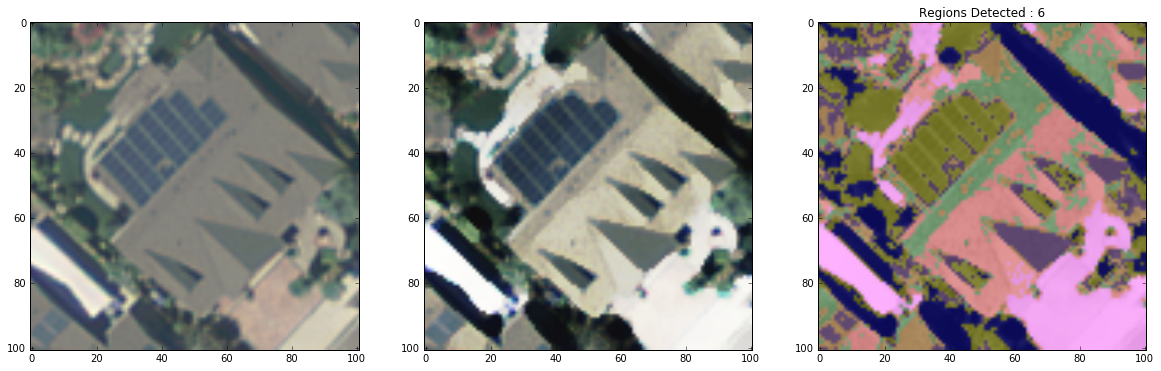

In [695]:
labels = np.reshape(labels, [101, 101])
image_label_overlay = color.label2rgb(labels, image=img, image_alpha=1)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize = (20,20))
ax1.imshow(io.imread(solar))
ax3.imshow(image_label_overlay)
ax2.imshow(img)
n = 0
for region in regionprops(labels):
#    print(region.area)
    # draw rectangle around segmented coins
    #minr, minc, maxr, maxc = region.bbox
    #rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
    #                          fill=False, edgecolor='red', linewidth=5)
    #ax3.add_patch(rect)
    n += 1

ax3.set_title("Regions Detected : " + str(n))